### Introduction to the Data Analysis:

This dataset represents sales transactions from an e-commerce platform or retail business, containing detailed information about individual sales orders. It includes various attributes that can be used to analyze sales performance, customer behavior, inventory trends, and operational efficiency. The dataset offers valuable insights into the business's operations, such as how different products and regions contribute to overall revenue, the impact of discounts, and customer preferences.

The dataset consists of the following columns:

1. **InvoiceNo**: A unique identifier for each sales transaction.
2. **StockCode**: A unique identifier for each product sold.
3. **Description**: A textual description of the product.
4. **Quantity**: The number of units sold in the transaction.
5. **InvoiceDate**: The date and time when the transaction occurred.
6. **UnitPrice**: The price of a single unit of the product at the time of sale.
7. **CustomerID**: A unique identifier for each customer making a purchase.
8. **Country**: The country where the customer is located.
9. **Discount**: The discount applied to the transaction, if any.
10. **PaymentMethod**: The payment method used in the transaction (e.g., credit card, PayPal).
11. **ShippingCost**: The cost of shipping for the transaction.
12. **Category**: The product category (e.g., electronics, clothing).
13. **SalesChannel**: The channel through which the sale was made (e.g., online, in-store).
14. **ReturnStatus**: Indicates whether the product was returned (e.g., returned, not returned).
15. **ShipmentProvider**: The company responsible for delivering the product.
16. **WarehouseLocation**: The location of the warehouse from which the product was shipped.
17. **OrderPriority**: Indicates the priority level of the order (e.g., high, medium, low).

### Objective of the Analysis:

The primary objective of this analysis is to uncover insights about the business's sales performance, customer behavior, and operational trends. By analyzing key variables such as total sales, customer demographics, product popularity, and sales by region, we can:

1. **Identify top-performing countries and regions**: Analyze which countries generate the highest revenue and identify patterns in product preferences by location.
   
2. **Understand customer purchasing behavior**: Investigate how payment methods, discounts, and product categories influence customer buying decisions.

3. **Assess the effectiveness of discounts and sales channels**: Evaluate the impact of discounts on total sales and identify which sales channels contribute the most to revenue.

4. **Optimize inventory and shipping**: Analyze warehouse locations, shipping costs, and return rates to optimize supply chain management and improve operational efficiency.

5. **Product Performance**: Identify which products are bestsellers in each category or region and uncover potential opportunities for inventory or marketing adjustments.

This analysis provides actionable insights that can help improve decision-making across various aspects of the business, including marketing strategies, sales forecasts, inventory management, and customer targeting.


IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATASET

In [ ]:
df=pd.read_csv(r"c:\DataScience\dataset\online_sales_dataset.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


ANALYSIS AND CLEANING

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.480000,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium
6,210268,SKU_1087,USB Cable,25,2020-01-01 06:00,85.74,46567.0,Belgium,0.150000,Bank Transfer,12.92,Stationery,Online,Not Returned,FedEx,Amsterdam,High
7,832180,SKU_1597,Notebook,8,2020-01-01 07:00,95.65,75098.0,Norway,0.040000,Bank Transfer,6.48,Electronics,In-store,Not Returned,Royal Mail,Amsterdam,Low
8,154886,SKU_1907,Wireless Mouse,19,2020-01-01 08:00,98.19,87950.0,Belgium,0.050000,paypall,12.56,Apparel,Online,Not Returned,UPS,Berlin,High
9,237337,SKU_1866,Headphones,40,2020-01-01 09:00,98.17,39718.0,Italy,0.160000,Bank Transfer,7.71,Apparel,Online,Not Returned,Royal Mail,London,Low


In [7]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49772,224131,SKU_1095,USB Cable,27,2025-09-04 20:00,30.87,63980.0,Italy,0.38,Credit Card,14.48,Apparel,In-store,Not Returned,UPS,Amsterdam,High
49773,370260,SKU_1570,Blue Pen,12,2025-09-04 21:00,51.83,85250.0,Italy,0.32,Credit Card,22.44,Accessories,In-store,Not Returned,Royal Mail,Rome,Medium
49774,274759,SKU_1899,USB Cable,43,2025-09-04 22:00,12.63,14206.0,Sweden,0.11,paypall,27.75,Electronics,Online,Not Returned,DHL,Amsterdam,High
49775,405597,SKU_1140,Backpack,37,2025-09-04 23:00,66.64,12024.0,Italy,0.35,paypall,19.93,Apparel,Online,Returned,UPS,Rome,Low
49776,524453,SKU_1316,Office Chair,43,2025-09-05 00:00,84.19,84399.0,United Kingdom,0.25,Credit Card,21.38,Electronics,Online,Not Returned,DHL,Amsterdam,Low
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [8]:
df.shape

(49782, 17)

In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [11]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
print(df.head())

   InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38 2020-01-01 00:00:00       1.71   
1     771155  SKU_1241   White Mug        18 2020-01-01 01:00:00      41.25   
2     231932  SKU_1501  Headphones        49 2020-01-01 02:00:00      29.11   
3     465838  SKU_1760   Desk Lamp        14 2020-01-01 03:00:00      76.68   
4     359178  SKU_1386   USB Cable       -30 2020-01-01 04:00:00     -68.11   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Appar

In [12]:
df.describe(include= 'object')

,StockCode,Description,Country,PaymentMethod,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
count,49782,49782,49782,49782,49782,49782,49782,49782,46297,49782
unique,1000,11,12,3,5,2,2,4,5,3
top,SKU_1761,Wall Clock,France,Bank Transfer,Furniture,Online,Not Returned,FedEx,Amsterdam,Medium
freq,76,4617,4230,16747,10084,25051,44888,12501,9458,16678


In [13]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [15]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [16]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,2022-11-03 02:30:00,47.537862,55032.871775,0.275748,17.494529
min,100005.000000,-50.000000,2020-01-01 00:00:00,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,2021-06-02 13:15:00,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,2022-11-03 02:30:00,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,2024-04-04 15:45:00,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,2025-09-05 05:00:00,100.000000,99998.000000,1.999764,30.000000
std,260703.009944,17.917774,NaN,33.479510,25913.660157,0.230077,7.220557


In [17]:
print(df.isna().sum().sum())

10952


In [18]:
print(df.dropna(inplace=True))

None


In [19]:
print(df.isna().sum().sum())

0


In [20]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
print(df.head())

   InvoiceNo StockCode   Description  Quantity         InvoiceDate  UnitPrice  \
0     221958  SKU_1964     White Mug        38 2020-01-01 00:00:00       1.71   
1     771155  SKU_1241     White Mug        18 2020-01-01 01:00:00      41.25   
2     231932  SKU_1501    Headphones        49 2020-01-01 02:00:00      29.11   
3     465838  SKU_1760     Desk Lamp        14 2020-01-01 03:00:00      76.68   
5     744167  SKU_1006  Office Chair        47 2020-01-01 05:00:00      70.16   

   CustomerID      Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0    Australia      0.47  Bank Transfer         10.79   
1     19144.0        Spain      0.19        paypall          9.51   
2     50472.0      Germany      0.35  Bank Transfer         23.03   
3     96586.0  Netherlands      0.14        paypall         11.08   
5     53887.0       Sweden      0.48    Credit Card         13.98   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Apparel    

In [21]:
df.loc[0,'ShippingCost'] =12.34
print(df.head())

   InvoiceNo StockCode   Description  Quantity         InvoiceDate  UnitPrice  \
0     221958  SKU_1964     White Mug        38 2020-01-01 00:00:00       1.71   
1     771155  SKU_1241     White Mug        18 2020-01-01 01:00:00      41.25   
2     231932  SKU_1501    Headphones        49 2020-01-01 02:00:00      29.11   
3     465838  SKU_1760     Desk Lamp        14 2020-01-01 03:00:00      76.68   
5     744167  SKU_1006  Office Chair        47 2020-01-01 05:00:00      70.16   

   CustomerID      Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0    Australia      0.47  Bank Transfer         12.34   
1     19144.0        Spain      0.19        paypall          9.51   
2     50472.0      Germany      0.35  Bank Transfer         23.03   
3     96586.0  Netherlands      0.14        paypall         11.08   
5     53887.0       Sweden      0.48    Credit Card         13.98   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Apparel    

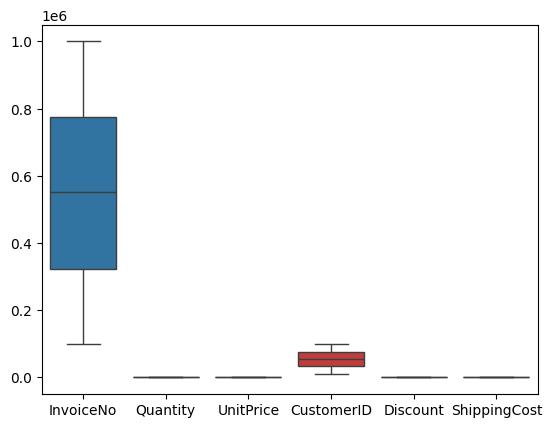

In [22]:
sns.boxplot(data=df)
plt.show()

correlation

a single number that describes the extent of the linear relationship between two variables

In [44]:
correlation=df.corr(numeric_only=True)
print(correlation)



              InvoiceNo  Quantity  UnitPrice  CustomerID  Discount  \
InvoiceNo      1.000000  0.007537  -0.013234    0.000730 -0.000147   
Quantity       0.007537  1.000000  -0.003724    0.002889 -0.000625   
UnitPrice     -0.013234 -0.003724   1.000000    0.000065 -0.005517   
CustomerID     0.000730  0.002889   0.000065    1.000000  0.010822   
Discount      -0.000147 -0.000625  -0.005517    0.010822  1.000000   
ShippingCost   0.001495 -0.004302   0.004834    0.004068 -0.003883   
TotalSales    -0.005305  0.656682   0.653457    0.001311 -0.005811   
totalsales    -0.005305  0.656682   0.653457    0.001311 -0.005811   
Revenue       -0.005382  0.629526   0.626960   -0.001080 -0.219464   

              ShippingCost  TotalSales  totalsales   Revenue  
InvoiceNo         0.001495   -0.005305   -0.005305 -0.005382  
Quantity         -0.004302    0.656682    0.656682  0.629526  
UnitPrice         0.004834    0.653457    0.653457  0.626960  
CustomerID        0.004068    0.001311    0.001

In [24]:
covarience=df.cov(numeric_only=True)
print(covarience)

                 InvoiceNo      Quantity     UnitPrice    CustomerID  \
InvoiceNo     6.795460e+10  27799.523326 -98657.038182  4.933277e+06   
Quantity      2.779952e+04    200.222673     -1.506716  1.059163e+03   
UnitPrice    -9.865704e+04     -1.506716    817.782745  4.801933e+01   
CustomerID    4.933277e+06   1059.163474     48.019327  6.715178e+08   
Discount     -5.541059e+00     -0.001277     -0.022775  4.047946e+01   
ShippingCost  2.814029e+03     -0.439445      0.997797  7.609726e+02   

               Discount  ShippingCost  
InvoiceNo     -5.541059   2814.028501  
Quantity      -0.001277     -0.439445  
UnitPrice     -0.022775      0.997797  
CustomerID    40.479455    760.972572  
Discount       0.020837     -0.004046  
ShippingCost  -0.004046     52.106094  




heat map

Heatmap is defined as a graphical representation of data using colors to visualize the value


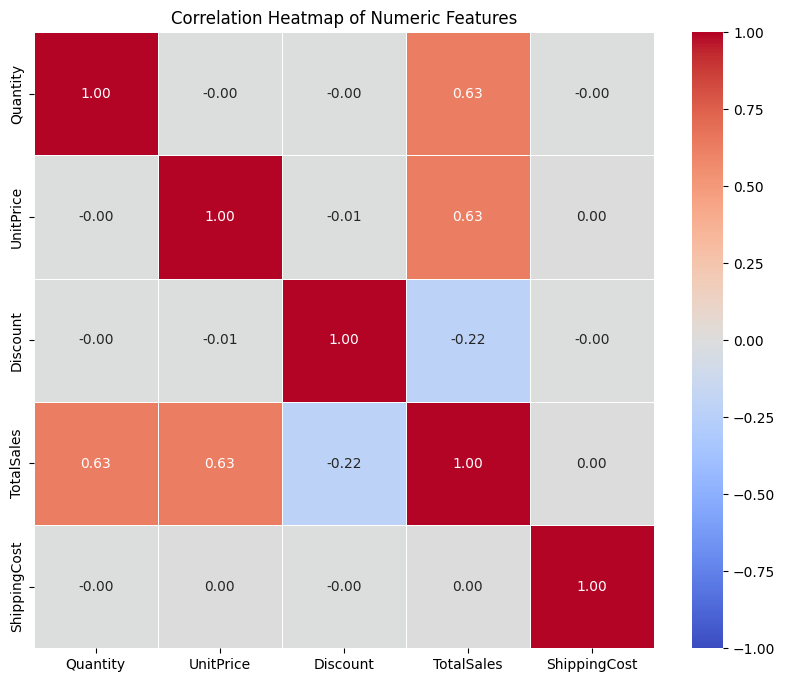

In [25]:
# Step 1: Calculate Total Sales (new column)
df['TotalSales'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])

# Step 2: Select relevant numeric columns for correlation analysis
numeric_columns = ['Quantity', 'UnitPrice', 'Discount', 'TotalSales', 'ShippingCost']

# Step 3: Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Step 4: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

data analysis and visualization

1which product have highest unit price       
2.which one is the most used payment method     
3.which country has hig shipping cost            
4.which country has low shipping cost             
5. What is the distribution of sales by CustomerID  
6 What is the distribution of sales by OrderPriority
7.which product have low discount                 
8.which product have high discount                 
9.which is the most used sales channel              
10.count  the returned items                                 
11.What is the overall revenue?                    
12.How do sales vary by product category?           
13 Which countries have the highest sales and which products are most popular in each country?            
14.How does SalesChannel influence sales volume? 
15.What are the sales trends over time, visualize the sales trends over time using a line chart?
16. How do sales (Quantity * UnitPrice) vary across different product categories?
17. What is the sales trend over time (by month)? How do the sales fluctuate throughout the year?
18. What is the average discount applied to purchases across different countries,give a graph

In [26]:
#1which product have highest unit price  
sdd=df.groupby('Description')
print((sdd['UnitPrice'].agg(np.max)))


Description
Backpack           99.98
Blue Pen           99.96
Desk Lamp         100.00
Headphones         99.94
Notebook           99.95
Office Chair       99.98
T-shirt            99.99
USB Cable          99.97
Wall Clock        100.00
White Mug          99.94
Wireless Mouse     99.99
Name: UnitPrice, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_11960\3022460655.py:3: FutureWarning: The provided callable <function max at 0x0000023256002560> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print((sdd['UnitPrice'].agg(np.max)))


In [27]:
#2.which one is the most used payment method 
grouped=(df.groupby('PaymentMethod'))
print(grouped.agg(np.size))

               InvoiceNo  StockCode  Description  Quantity  InvoiceDate  \
PaymentMethod                                                             
Bank Transfer      15086      15086        15086     15086        15086   
Credit Card        14907      14907        14907     14907        14907   
paypall            14811      14811        14811     14811        14811   

               UnitPrice  CustomerID  Country  Discount  ShippingCost  \
PaymentMethod                                                           
Bank Transfer      15086       15086    15086     15086         15086   
Credit Card        14907       14907    14907     14907         14907   
paypall            14811       14811    14811     14811         14811   

               Category  SalesChannel  ReturnStatus  ShipmentProvider  \
PaymentMethod                                                           
Bank Transfer     15086         15086         15086             15086   
Credit Card       14907         14907  

In [28]:
#3.which country has high shipping cost 
gr=df.groupby('Country')
print((gr['ShippingCost'].agg(np.max)))


Country
Australia         30.00
Belgium           29.98
France            30.00
Germany           29.98
Italy             30.00
Netherlands       30.00
Norway            30.00
Portugal          29.98
Spain             30.00
Sweden            29.96
United Kingdom    30.00
United States     29.99
Name: ShippingCost, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_11960\3617046123.py:3: FutureWarning: The provided callable <function max at 0x0000023256002560> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print((gr['ShippingCost'].agg(np.max)))


In [29]:
#4.which country has low shipping cost
gr=df.groupby('Country')
print((gr['ShippingCost'].agg(np.min)))
#print(min(gr['ShippingCost'].agg(np.min)))

Country
Australia         5.01
Belgium           5.01
France            5.02
Germany           5.01
Italy             5.00
Netherlands       5.00
Norway            5.01
Portugal          5.01
Spain             5.01
Sweden            5.02
United Kingdom    5.00
United States     5.04
Name: ShippingCost, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_11960\3461588953.py:3: FutureWarning: The provided callable <function min at 0x0000023256002680> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print((gr['ShippingCost'].agg(np.min)))


In [30]:
#5. What is the distribution of sales by CustomerID
df['totalsales']=df['Quantity']*df['UnitPrice']
dgg=df.groupby('CustomerID')['totalsales'].sum()
print(dgg)

CustomerID
10001.0    1516.22
10003.0     377.05
10005.0    2527.15
10008.0      62.60
10009.0     827.84
            ...   
99986.0    2572.40
99989.0      42.46
99993.0     404.56
99997.0    2695.80
99998.0    3825.79
Name: totalsales, Length: 35389, dtype: float64


In [31]:
#6 What is the distribution of sales by OrderPriority
df['totalsales']=df['Quantity']*df['UnitPrice']
dgg=df.groupby('OrderPriority')['totalsales'].sum()
print(dgg)

OrderPriority
High      18724637.65
Low       18776217.70
Medium    18900489.71
Name: totalsales, dtype: float64


In [32]:
#7which product have low discount 
gh=df.groupby('Description')
print((gh['Discount'].agg(np.min)))

Description
Backpack          0.0
Blue Pen          0.0
Desk Lamp         0.0
Headphones        0.0
Notebook          0.0
Office Chair      0.0
T-shirt           0.0
USB Cable         0.0
Wall Clock        0.0
White Mug         0.0
Wireless Mouse    0.0
Name: Discount, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_11960\419592373.py:3: FutureWarning: The provided callable <function min at 0x0000023256002680> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print((gh['Discount'].agg(np.min)))


In [33]:
#8.which product have high discount
gh=df.groupby('Description')
print((gh['Discount'].agg(np.max)))

Description
Backpack          0.5
Blue Pen          0.5
Desk Lamp         0.5
Headphones        0.5
Notebook          0.5
Office Chair      0.5
T-shirt           0.5
USB Cable         0.5
Wall Clock        0.5
White Mug         0.5
Wireless Mouse    0.5
Name: Discount, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_11960\1070637002.py:3: FutureWarning: The provided callable <function max at 0x0000023256002560> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print((gh['Discount'].agg(np.max)))


In [34]:
#9.which is the most used sales channel
hh=df.groupby('SalesChannel')
print(hh.agg(np.size))

              InvoiceNo  StockCode  Description  Quantity  InvoiceDate  \
SalesChannel                                                             
In-store          22284      22284        22284     22284        22284   
Online            22520      22520        22520     22520        22520   

              UnitPrice  CustomerID  Country  Discount  PaymentMethod  \
SalesChannel                                                            
In-store          22284       22284    22284     22284          22284   
Online            22520       22520    22520     22520          22520   

              ShippingCost  Category  ReturnStatus  ShipmentProvider  \
SalesChannel                                                           
In-store             22284     22284         22284             22284   
Online               22520     22520         22520             22520   

              WarehouseLocation  OrderPriority  TotalSales  totalsales  
SalesChannel                                    

In [35]:
#10.count  the returned items  
returned_items = df[df['ReturnStatus'] == 'Returned']
returned_count = returned_items['Quantity'].sum()
print(returned_items)
print(returned_count)

       InvoiceNo StockCode   Description  Quantity         InvoiceDate  \
2         231932  SKU_1501    Headphones        49 2020-01-01 02:00:00   
10        621430  SKU_1144      Notebook        49 2020-01-01 10:00:00   
19        887201  SKU_1119     USB Cable        46 2020-01-01 19:00:00   
20        421879  SKU_1578    Wall Clock        43 2020-01-01 20:00:00   
33        586232  SKU_1722    Wall Clock        14 2020-01-02 09:00:00   
...          ...       ...           ...       ...                 ...   
49751     352868  SKU_1131     Desk Lamp        17 2025-09-03 23:00:00   
49757     170681  SKU_1613      Blue Pen         3 2025-09-04 05:00:00   
49769     701257  SKU_1092  Office Chair        19 2025-09-04 17:00:00   
49775     405597  SKU_1140      Backpack        37 2025-09-04 23:00:00   
49777     354083  SKU_1562      Blue Pen        25 2025-09-05 01:00:00   

       UnitPrice  CustomerID         Country  Discount  PaymentMethod  \
2          29.11     50472.0         G

In [36]:
#11.What is the overall revenue?
# Calculate revenue for each transaction, considering the discount
df['Revenue'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])
# Calculate the overall revenue by summing up all the individual revenues
overall_revenue = df['Revenue'].sum()
print(overall_revenue)




42315199.7491


In [37]:
# 12.Which countries have the highest sales and which products are most popular in each country?
# Step 1: Calculate total sales for each transaction
df['TotalSales'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])
# Step 2: Calculate total sales by country
total_sales_by_country = df.groupby('Country')['TotalSales'].sum().reset_index()
# Sort by total sales in descending order
total_sales_by_country = total_sales_by_country.sort_values(by='TotalSales', ascending=False)
# Step 3: Find the most popular products by country (group by Country and Product)
popular_products_by_country = df.groupby(['Country', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
# Sort within each country by Quantity sold (most popular products first)
popular_products_by_country = popular_products_by_country.sort_values(by=['Country', 'Quantity'], ascending=[True, False])
print("Total Sales by Country:")
print(total_sales_by_country)
print("Total Sales by Country:")
print(total_sales_by_country)

Total Sales by Country:
           Country    TotalSales
1          Belgium  3.628108e+06
11   United States  3.609185e+06
2           France  3.577958e+06
9           Sweden  3.555066e+06
3          Germany  3.548894e+06
10  United Kingdom  3.539162e+06
7         Portugal  3.521324e+06
8            Spain  3.512490e+06
6           Norway  3.495542e+06
4            Italy  3.478254e+06
0        Australia  3.440395e+06
5      Netherlands  3.408821e+06
Total Sales by Country:
           Country    TotalSales
1          Belgium  3.628108e+06
11   United States  3.609185e+06
2           France  3.577958e+06
9           Sweden  3.555066e+06
3          Germany  3.548894e+06
10  United Kingdom  3.539162e+06
7         Portugal  3.521324e+06
8            Spain  3.512490e+06
6           Norway  3.495542e+06
4            Italy  3.478254e+06
0        Australia  3.440395e+06
5      Netherlands  3.408821e+06


In [38]:
#14.How does SalesChannel influence sales volume?
# Group by SalesChannel and calculate total quantity sold and total revenue
channel_sales = df.groupby('SalesChannel').agg(
    TotalQuantitySold=('Quantity', 'sum'),
    TotalRevenue=('Revenue', 'sum')
).reset_index()
# Sort by total quantity sold in descending order to see the most successful channels
channel_sales = channel_sales.sort_values(by='TotalQuantitySold', ascending=False)
print(channel_sales)


  SalesChannel  TotalQuantitySold  TotalRevenue
1       Online             560732  2.121930e+07
0     In-store             554752  2.109590e+07


   YearMonth  TotalRevenue  TotalQuantitySold
0    2020-01   612490.2655              16995
1    2020-02   610190.7526              15596
2    2020-03   636127.8584              17300
3    2020-04   643750.6862              17030
4    2020-05   622568.3580              16070
..       ...           ...                ...
64   2025-05   624832.8523              16195
65   2025-06   593767.8946              16471
66   2025-07   614516.4775              16519
67   2025-08   661645.3251              16699
68   2025-09    84886.4061               2311

[69 rows x 3 columns]


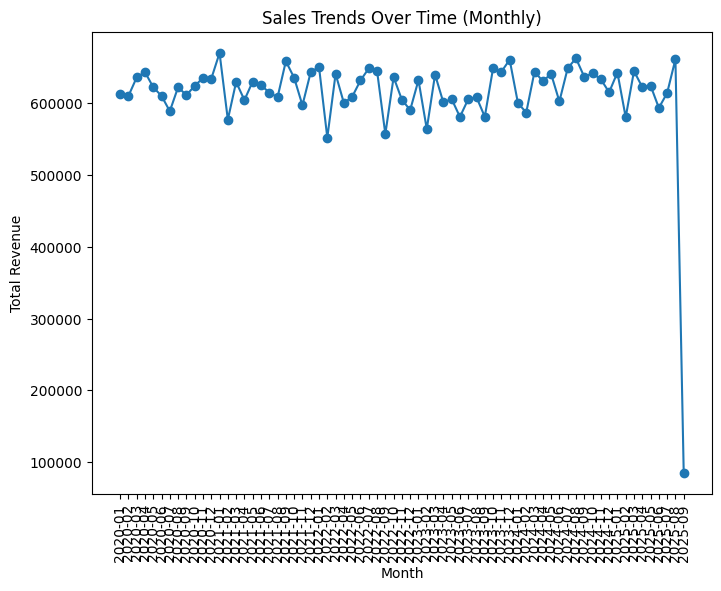

In [39]:
#15.What are the sales trends over time, visualize the sales trends over time using a line chart?
# Calculate revenue for each transaction, considering the discount
df['Revenue'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])

# Group by year and month to calculate total revenue and total quantity sold
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')  # Group by year and month
monthly_sales = df.groupby('YearMonth').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalQuantitySold=('Quantity', 'sum')
).reset_index()

# Display the results
print(monthly_sales)

# Plot the total revenue over time (by month)
plt.figure(figsize=(8,6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['TotalRevenue'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Sales Trends Over Time (Monthly)')
plt.xticks(rotation=90)
plt.show()


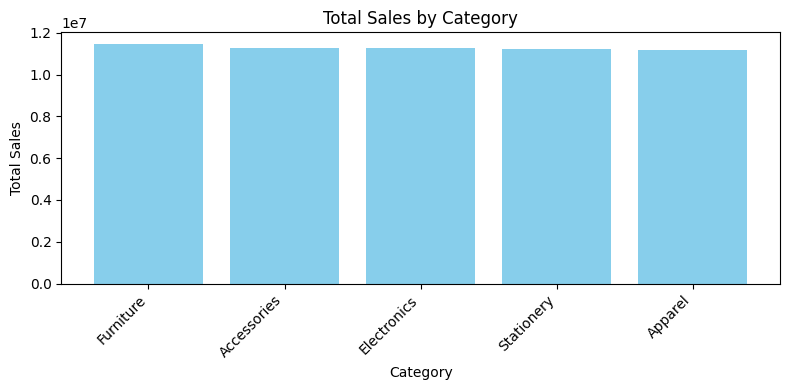

In [40]:
# How do sales (Quantity * UnitPrice) vary across different product categories
# Calculate total sales for each transaction
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by 'Category' and sum the total sales
category_sales = df.groupby('Category')['TotalSales'].sum().reset_index()

# Sort the categories by total sales
category_sales = category_sales.sort_values(by='TotalSales', ascending=False)

# Plot the bar chart
plt.figure(figsize=(8,4))
plt.bar(category_sales['Category'], category_sales['TotalSales'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

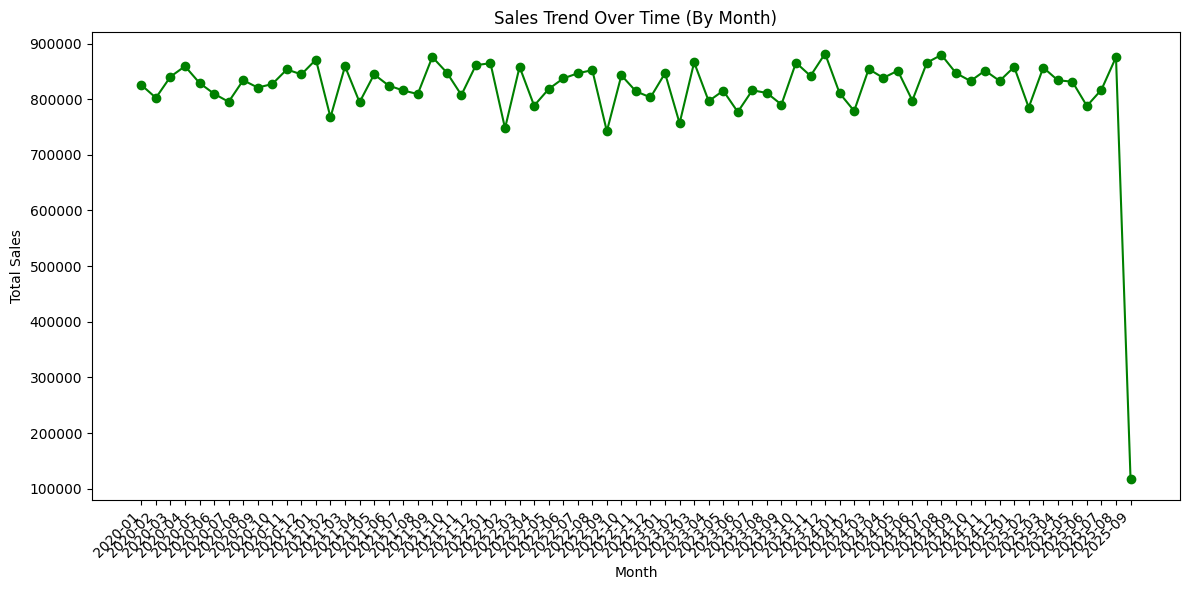

In [41]:
# What is the sales trend over time (by month)? How do the sales fluctuate throughout the year?
# Calculate total sales for each transaction
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by Year-Month and sum the total sales
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['TotalSales'], marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time (By Month)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11960\3929352476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount', y='Country', data=df, palette='Set2')


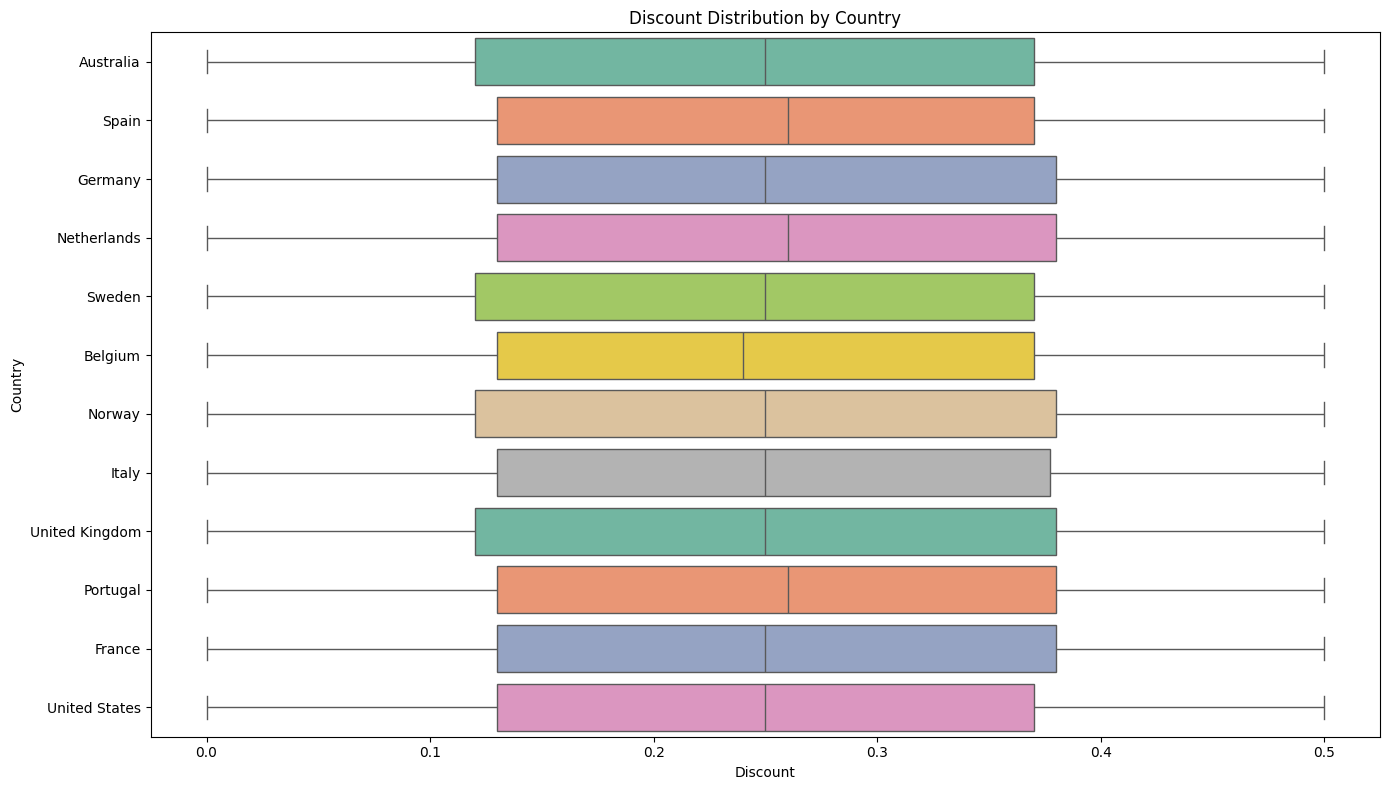

In [42]:
# What is the average discount applied to purchases across different countries,give a graph
# Plotting the box plot for discount distribution by country
plt.figure(figsize=(14, 8))
sns.boxplot(x='Discount', y='Country', data=df, palette='Set2')

# Labeling the plot
plt.xlabel('Discount')
plt.ylabel('Country')
plt.title('Discount Distribution by Country')
plt.tight_layout()

# Show the plot
plt.show()


### Summary of Dataset Analysis

The dataset provides detailed transactional information from a business, containing fields such as **InvoiceNo**, **StockCode**, **Description**, **Quantity**, **UnitPrice**, **CustomerID**, **Country**, **Discount**, **PaymentMethod**, **ShippingCost**, **Category**, **SalesChannel**, **ReturnStatus**, **ShipmentProvider**, **WarehouseLocation**, and **OrderPriority**. The analysis of this dataset explores key aspects such as sales performance, product pricing, customer behavior, and geographic trends. Here’s a summary of the main findings:

---

### Key Insights:

1. **Product Pricing**:
   - The **product with the highest unit price** is identified, providing insights into premium products that could contribute significantly to revenue.
   - The **product with the highest and lowest discount** are also identified, which can help in understanding pricing strategies and promotions.

2. **Payment Methods**:
   - By analyzing the **most used payment method**, we understand customer preferences for transactions. This insight can guide the business in focusing on popular payment systems and improving customer convenience.

3. **Shipping Costs**:
   - **Countries with the highest and lowest shipping costs** are identified. This helps in assessing logistics and operational efficiency. High shipping costs may indicate areas where the company can reduce overheads or optimize logistics.
  
4. **Sales by Customer**:
   - **Sales distribution by CustomerID** reveals which customers are the most valuable, enabling targeted marketing or loyalty strategies to retain high-value customers.
   - Similarly, the **sales distribution by OrderPriority** shows how different order priorities (High, Medium, Low) impact sales and how urgent orders contribute to revenue.

5. **Returned Items**:
   - The analysis of **returned items** can help identify product quality issues or dissatisfaction with certain products. High return rates might indicate a need for product improvements or better descriptions.

6. **Revenue**:
   - **Overall revenue** is calculated by summing the total sales (Quantity * UnitPrice) across all transactions. This figure provides an overall snapshot of business performance.

7. **Product Categories**:
   - Sales are grouped by **product category**, which shows how different categories contribute to total sales. This helps in identifying the most profitable categories and areas where the business can focus its marketing or product development efforts.

8. **Geographic Insights**:
   - The analysis identifies **countries with the highest sales** and the **most popular products in each country**. This information helps understand regional preferences and market penetration, assisting in targeted strategies for product promotion in different regions.

9. **Sales Channels**:
   - The **most used sales channel** (e.g., online vs. in-store) provides insights into how customers are purchasing products and how the company should allocate resources for various channels.
   - The influence of the **SalesChannel on sales volume** can help prioritize investments in more profitable channels.

10. **Sales Trends Over Time**:
   - **Sales trends over time** (visualized via line charts) show how sales fluctuate seasonally or during specific periods. Identifying peak months and low periods helps the business plan for demand fluctuations and manage inventory.
   - The **monthly sales trend** further breaks down sales by month, offering detailed insights into seasonal patterns and potential areas for business improvement.

11. **Discounts by Country**:
   - The **average discount applied to purchases across different countries** is analyzed through a box plot. This gives insight into geographic variations in promotional strategies and helps assess the effectiveness of discounts in various regions.

---

### Visualizations:

- **Bar charts** are used to show the highest-priced products, most used payment methods, and sales by product category.
- **Pie charts** visualize the distribution of payment methods and sales channels.
- **Box plots** highlight the distribution of discounts by country and sales trends over time.
- **Line charts** show how sales change over time, both by month and year.
- **Histograms** visualize the distribution of sales by CustomerID, helping identify customer segments.

---

### Business Implications:

1. **Customer Segmentation**: Identifying high-value customers and understanding their purchasing behavior allows the company to create personalized marketing campaigns and loyalty programs.
   
2. **Pricing Strategies**: By examining product discounts and pricing, the company can optimize its pricing strategy and focus on products that offer the best margins.
   
3. **Logistics Optimization**: Insights into shipping costs by country provide the company with data to optimize its shipping methods and potentially reduce costs in regions with high shipping expenses.
   
4. **Product and Category Focus**: Understanding which product categories generate the most sales allows the company to focus its resources on promoting the most profitable products.

5. **Sales Channel Optimization**: Analyzing how sales vary by channel helps the company allocate resources effectively, focusing on high-performing sales channels.

6. **Seasonal Planning**: By recognizing seasonal sales trends, the company can plan its inventory and marketing strategies accordingly, ensuring products are available during peak demand periods.

---

### Conclusion:

This dataset analysis provides a comprehensive understanding of various business performance metrics. Key insights regarding sales, customer behavior, shipping costs, and product performance help the company make data-driven decisions to optimize pricing, marketing, sales strategies, and logistics. The ability to visualize these insights using charts and graphs further aids in identifying patterns and trends that are crucial for making informed strategic decisions.